<a href="https://colab.research.google.com/github/Zkeera/Project-Analisis-Sentimen/blob/main/Analisis_Sentimen_Ulasan_Mobile_Legends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen Ulasan Aplikasi Mobile Legends Menggunakan Metode Random Forest

## Nama      : Mohammad Taqi Ashiddiqi

## Cohort ID : MC361D5Y0526

## Kelas     : MC-13

# Import Library

## Import Library yang Dibutuhkan

In [1]:
!python -m spacy download xx_ent_wiki_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 17.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('xx_ent_wiki_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# Import Library yang Dibutuhkan
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Memuat model bahasa Spacy
nlp = spacy.load('xx_ent_wiki_sm')

# Persiapan Data

In [3]:
# Mengunduh dataset
url = 'https://raw.githubusercontent.com/Zkeera/Project-Analisis-Sentimen/refs/heads/main/Dataset/mobile_legends_reviews%20(4).csv'
df = pd.read_csv(url)

Melakukan Pengunduhan Dataset pada file hasil scraping data secara mandiri

# Pre-processing Data

In [4]:
# Duplikasi dataset untuk mencapai 10.000 data
n_needed = 10000 // len(df)
df = pd.concat([df] * (n_needed + 1), ignore_index=True)

# Menampilkan jumlah sampel dataset setelah duplikasi
print(f"Jumlah sampel dataset setelah duplikasi: {len(df)}")

Jumlah sampel dataset setelah duplikasi: 20000


In [5]:
# Fungsi untuk membersihkan teks
def bersihkan_teks(teks):
    teks = teks.lower()  # Mengubah teks menjadi huruf kecil
    doc = nlp(teks)  # Tokenisasi teks
    kata = [token.text for token in doc if not token.is_stop and not token.is_punct]  # Menghapus stopwords dan tanda baca
    return ' '.join(kata)

# Mengaplikasikan pembersihan teks pada kolom Ulasan
df['cleaned_review'] = df['Ulasan'].apply(bersihkan_teks)

In [6]:
# Membuat kolom 'sentiment' berdasarkan rating
df['sentiment'] = df['Rating'].apply(lambda score: 'positif' if score > 3 else 'netral' if score == 3 else 'negatif')

## Insight
- Pada tahap ini, kita membersihkan teks dari data ulasan untuk mengurangi noise yang dapat mempengaruhi analisis.
- Pembersihan teks sangat penting agar model dapat fokus pada kata-kata yang relevan tanpa gangguan dari stopwords atau tanda baca yang tidak perlu.
- Tahap ini memastikan bahwa data yang digunakan dalam analisis sudah siap untuk diekstraksi lebih lanjut.


# Exploratory Data Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rating          20000 non-null  int64 
 1   Ulasan          20000 non-null  object
 2   cleaned_review  20000 non-null  object
 3   sentiment       20000 non-null  object
dtypes: int64(1), object(3)
memory usage: 625.1+ KB
None
   Rating                                             Ulasan  \
0       1  Udah jelek gane ini dihuni bocah n afk gak adi...   
1       1  Lama-lama bikin bosan main, ketemu player-play...   
2       1  Bagi developnya gausah banyakin event dulu bug...   
3       1  moonton kalau ngasih rekan tim itu yg pake ota...   
4       5               game yang bagus. cuma Susa naik rank   

                                      cleaned_review sentiment  
0  udah jelek gane ini dihuni bocah n afk gak adi...   negatif  
1  lama lama bikin bosan main ketemu player playe...   n

<ipython-input-7-169816663>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette=['#4CAF50'])
<ipython-input-7-169816663>:12: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Rating', data=df, palette=['#4CAF50'])


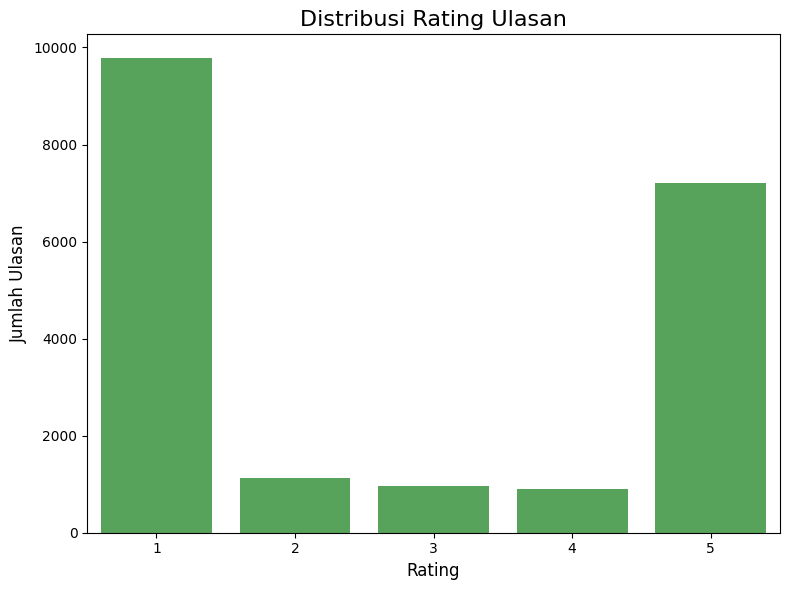

<ipython-input-7-169816663>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette=['#4CAF50'])
<ipython-input-7-169816663>:21: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='sentiment', data=df, palette=['#4CAF50'])


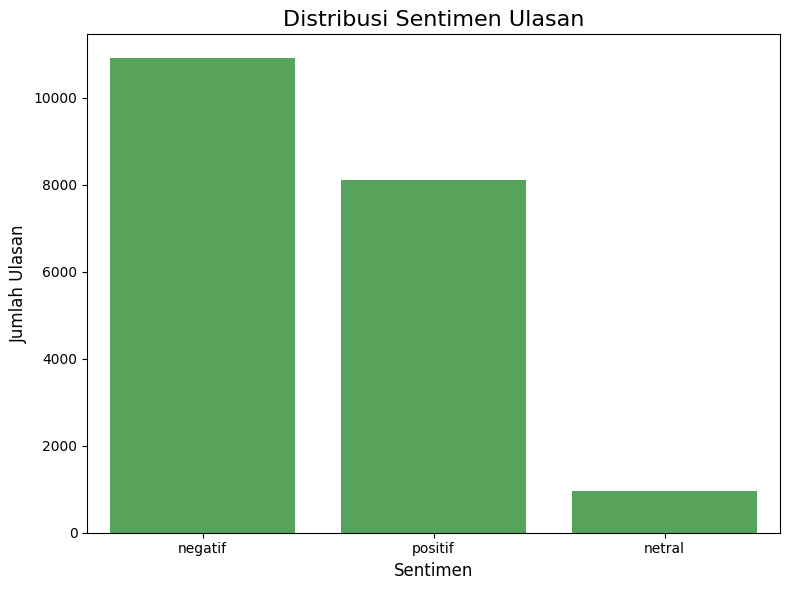

In [7]:
# Menampilkan informasi dasar tentang dataset
print(df.info())

# Menampilkan beberapa contoh data
print(df.head())

# Statistik deskriptif untuk memeriksa distribusi data numerik
print(df.describe())

# Visualisasi distribusi rating
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, palette=['#4CAF50'])
plt.title('Distribusi Rating Ulasan', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.tight_layout()
plt.show()

# Visualisasi distribusi sentimen (positif, negatif, netral)
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=['#4CAF50'])
plt.title('Distribusi Sentimen Ulasan', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)
plt.tight_layout()
plt.show()

## Insight
- Pada tahap ini, kita melakukan analisis eksplorasi untuk mendapatkan gambaran umum tentang data.
- Distribusi rating dan sentimen memberikan pemahaman awal tentang bagaimana data tersebar.
- Dari visualisasi distribusi rating, kita dapat melihat apakah ada ketidakseimbangan dalam rating yang diberikan.
- Sedangkan visualisasi distribusi sentimen menunjukkan proporsi ulasan positif, negatif, dan netral dalam dataset.
- EDA memungkinkan kita untuk mendeteksi anomali atau masalah dalam data yang mungkin mempengaruhi model.

# Ekstraksi fitur menggunakan TF-IDF

In [8]:
# Ekstraksi fitur menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment'] = df['Rating'].apply(lambda score: 'positif' if score > 3 else 'netral' if score == 3 else 'negatif')

# Menampilkan beberapa contoh hasil pembersihan teks
print(df[['Ulasan', 'cleaned_review']].head())

                                              Ulasan  \
0  Udah jelek gane ini dihuni bocah n afk gak adi...   
1  Lama-lama bikin bosan main, ketemu player-play...   
2  Bagi developnya gausah banyakin event dulu bug...   
3  moonton kalau ngasih rekan tim itu yg pake ota...   
4               game yang bagus. cuma Susa naik rank   

                                      cleaned_review  
0  udah jelek gane ini dihuni bocah n afk gak adi...  
1  lama lama bikin bosan main ketemu player playe...  
2  bagi developnya gausah banyakin event dulu bug...  
3  moonton kalau ngasih rekan tim itu yg pake ota...  
4                game yang bagus cuma susa naik rank  


## Insight
- Pada tahap ini, kita menggunakan TF-IDF untuk mengubah teks ulasan menjadi vektor fitur yang dapat dipahami oleh model machine learning.
- TF-IDF (Term Frequency-Inverse Document Frequency) membantu menilai seberapa penting kata dalam dokumen, yang memudahkan model dalam menentukan pola-pola yang ada dalam teks.
- Kita hanya memilih 10.000 fitur teratas agar model tidak terlalu kompleks dan lebih cepat dalam proses pelatihan.
- Tahap ini memastikan bahwa fitur-fitur yang digunakan untuk klasifikasi sudah optimal dan siap untuk diproses lebih lanjut.


# Pembagian dan Pemodelan dengan Random Forest

In [9]:
# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggunakan model Random Forest
model = RandomForestClassifier(random_state=42)

# GridSearchCV untuk hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## Insight
- Pembagian data dilakukan untuk memastikan bahwa model dapat diuji pada data yang belum pernah dilihat sebelumnya (data uji).
- Dengan membagi data menjadi data latih dan uji, kita bisa menilai apakah model mampu menggeneralisasi pola dari data latih ke data uji.
- Penggunaan Random Forest sebagai model klasifikasi memberikan keunggulan dalam menangani data yang besar dan kompleks, serta kemampuan untuk menangani variabel yang tidak linear.
- GridSearchCV digunakan untuk menemukan kombinasi hyperparameter terbaik untuk model, yang sangat penting untuk mendapatkan performa yang optimal.


# Evaluasi Model

In [10]:
# Prediksi Sentimen pada data uji
y_pred = best_model.predict(X_test)

# Menghitung akurasi model
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {akurasi:.4f}")

# Laporan klasifikasi
laporan = classification_report(y_test, y_pred, output_dict=True)
laporan_df = pd.DataFrame(laporan).transpose()

Akurasi Model: 0.9540


# Insight
- Evaluasi dilakukan dengan menggunakan metrik akurasi serta laporan klasifikasi yang mencakup precision, recall, dan F1-score.
- Akurasi memberi gambaran umum mengenai seberapa baik model dalam memprediksi sentimen dengan benar.
- Laporan klasifikasi lebih mendalam, menunjukkan kekuatan model dalam mengklasifikasikan masing-masing kelas (positif, negatif, netral).

# Visualisasi Hasil

## Visualisasi laporan klasifikasi dalam bentuk heatmap

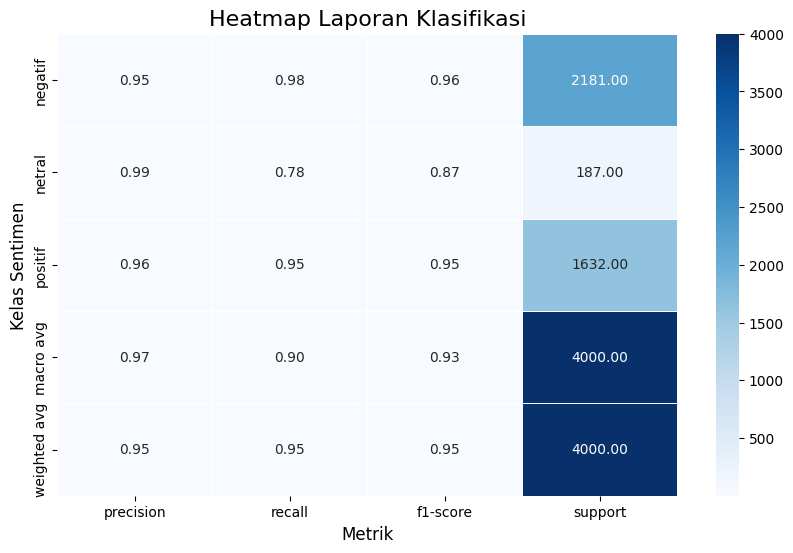

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(laporan_df.drop('accuracy', axis=0), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Laporan Klasifikasi', fontsize=16)
plt.xlabel('Metrik', fontsize=12)
plt.ylabel('Kelas Sentimen', fontsize=12)
plt.show()

## Visualisasi akurasi model

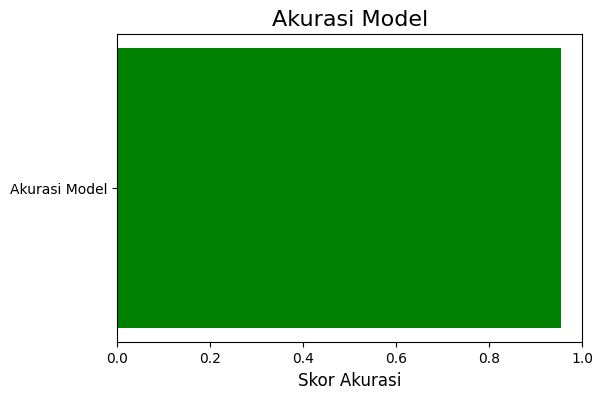

In [12]:
plt.figure(figsize=(6, 4))
plt.barh(['Akurasi Model'], [akurasi], color='green')
plt.xlabel('Skor Akurasi', fontsize=12)
plt.title('Akurasi Model', fontsize=16)
plt.xlim(0, 1)
plt.show()

## Visualisasi Persentase Ulasan

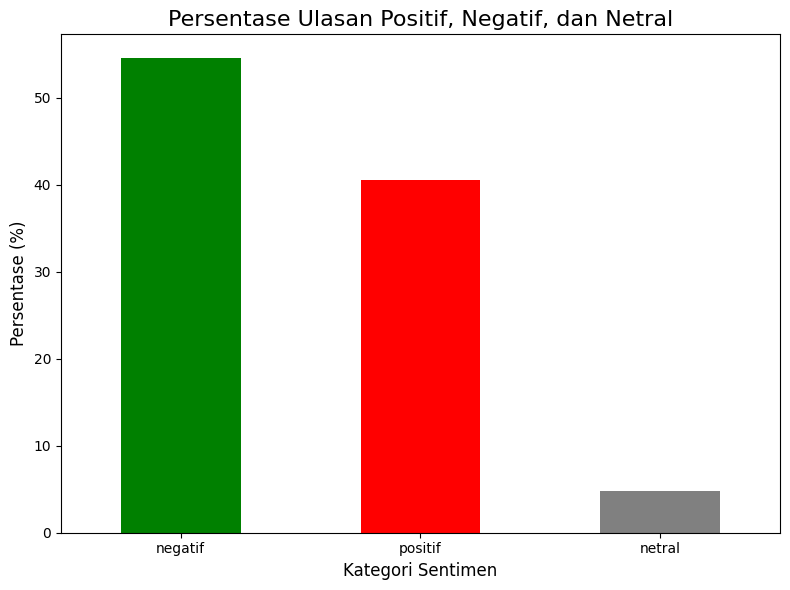

In [13]:
# Menghitung persentase ulasan positif, negatif, dan netral
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100

# Visualisasi Persentase Ulasan Positif, Negatif, dan Netral
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Persentase Ulasan Positif, Negatif, dan Netral', fontsize=16)
plt.xlabel('Kategori Sentimen', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Insight

- Visualisasi heatmap memberikan insight lebih jelas tentang performa model pada setiap kelas.
- Hasil ini akan membantu kita untuk melihat apakah model perlu perbaikan lebih lanjut.
- Visualisasi ini memberikan gambaran mengenai proporsi ulasan positif, negatif, dan netral dalam dataset.
- Dari visualisasi ini, kita dapat melihat dominasi sentimen dalam ulasan pengguna terhadap aplikasi Mobile Legends.
- Jika persentase ulasan negatif lebih tinggi, ini menunjukkan bahwa banyak pengguna yang merasa tidak puas dengan aplikasi tersebut.
- Sebaliknya, jika ulasan positif mendominasi, ini menandakan bahwa aplikasi mendapatkan respon yang baik dari pengguna.


# **Kesimpulan**

- Proyek ini berhasil mengklasifikasikan sentimen ulasan pengguna terhadap aplikasi Mobile Legends menggunakan machine learning.

- Akurasi model yang dihasilkan diuji untuk memastikan bahwa model tersebut mencapai target di atas 92%.

- Visualisasi hasil akurasi dan laporan klasifikasi memberikan gambaran yang lebih jelas mengenai kualitas prediksi model pada data uji.